In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet

In [37]:
df1 = pd.read_csv("G:\\Master Thesis\\filtered_hamburg.csv",index_col= 0)
df2 = pd.read_csv("G:\\Master Thesis\\filtered_hamburg2.csv",index_col= 0)
df = pd.concat([df1,df2],axis=0)
df = df.drop_duplicates()
df["Latitude"] = df["Latitude"].apply(lambda row: float(row.replace(",",".")))
df["Longitude"] = df["Longitude"].apply(lambda row: float(row.replace(",",".")))
df["Draught"] = df["Draught"].apply(lambda row: float(row.replace(",",".")))
df["SOG"] = df["SOG"].apply(lambda row: float(row.replace(",",".")))
df["COG"] = df["COG"].apply(lambda row: float(row.replace(",",".")))
df["date"] = df["time_UTC"].apply(lambda row: pd.to_datetime(row))
df = df.sort_values(by=["date"])
df_filtered = df[(df["Longitude"]>=8.2836914) & (df["Latitude"]<=54.0964496)]

In [38]:
def journeyID(row):
    month = row["date"].month
    day = row["date"].day
    mmsi = row["mmsi"]
    return str(mmsi) + "_" + str(day) + "_" + str(month)

In [39]:
df_filtered["journey_id"] = df_filtered.apply(lambda row: journeyID(row), axis=1)

<ipython-input-39-92e654dd9b7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["journey_id"] = df_filtered.apply(lambda row: journeyID(row), axis=1)


In [129]:
def findJourneyTime(df):
    unique_journeys = df["journey_id"].unique()
    journey_id = []
    delta_time = []
    end_lat = []
    end_lon = []
    start_lat = []
    start_lon = []
    for journ in unique_journeys:
        df_ship_journey = df[df["journey_id"] == journ]
        if (df_ship_journey.iloc[0]["Longitude"] <= 8.4484863):
            start_time = df_ship_journey.iloc[0]["date"]
            end_time = df_ship_journey.iloc[-1]["date"]
            journey_id.append(df_ship_journey.iloc[0]["journey_id"])
            delta_time.append(end_time - start_time)
            start_lat.append(df_ship_journey.iloc[0]["Latitude"])
            end_lat.append(df_ship_journey.iloc[-1]["Latitude"])
            start_lon.append(df_ship_journey.iloc[0]["Longitude"])
            end_lon.append(df_ship_journey.iloc[-1]["Longitude"])
    time_df = pd.DataFrame({"journey_id":journey_id, "delta_time": delta_time, "start_lat": start_lat,
                           "start_lon": start_lon, "end_lat": end_lat, "end_lon": end_lon})
    return time_df

In [130]:
time_df = findJourneyTime(df_filtered)

In [131]:
ship_parameters_df = df_filtered[["shiptype", "Length", "Breadth", "Draught", "Name", "journey_id"]].drop_duplicates()

In [132]:
combined_df = pd.merge(time_df, ship_parameters_df, how="left", left_on="journey_id", right_on="journey_id")

In [134]:
combined_df.head(25)

,journey_id,delta_time,start_lat,start_lon,end_lat,end_lon,shiptype,Length,Breadth,Draught,Name
0,372092000_31_1,00:03:59.556000,53.99371,8.285961,53.99367,8.318227,79,138,21,6.7,SINGLE EAGLE
1,372092000_1_2,07:00:58.610000,53.99364,8.326281,53.51290,9.945755,79,138,21,6.7,SINGLE EAGLE
2,255805577_1_2,07:36:04.094000,53.99247,8.285958,53.53702,9.909650,71,140,23,5.9,IRIS BOLTEN
3,538002883_1_2,06:53:10.240000,53.99374,8.285840,53.56222,9.738746,0,129,20,6.1,TEQUILA
4,240625000_1_2,02:41:07.930000,53.99124,8.291223,53.86420,9.051414,70,229,37,7.7,PRIGIPOS
5,259468000_1_2,02:37:06.610000,53.99759,8.287688,53.84955,9.318838,70,129,18,6.1,LYSVIK SEAWAYS
6,636017352_1_2,00:16:00.503000,53.99613,8.286815,53.98442,8.386065,79,225,32,9.6,CAP RICARDA
7,636017352_2_2,20:37:36.416000,53.98371,8.392281,53.53268,9.907284,79,225,32,9.6,CAP RICARDA
8,228084000_2_2,05:23:59.853000,53.99489,8.284012,53.54654,9.830236,79,154,24,5.7,VILLE DE BORDEAUX
9,244850075_2_2,15:49:10.584000,53.99497,8.284939,53.53257,9.939178,70,120,15,7.2,ARKLOW BREEZE


In [135]:
combined_df.to_csv("deltaTime_corected.csv", index=False)

In [106]:
ship_num_1  = "636014878_6_2"
ship_num_2  = "636091001_19_3"
df_ship1 = df_filtered[df_filtered["journey_id"] == ship_num_1]
df_ship2 = df_filtered[df_filtered["journey_id"] == ship_num_2]

In [107]:
fig,axs = plt.subplots(1,1,figsize=(15,7))
axs = plt.scatter(df_ship1["Longitude"].values[:], df_ship1["Latitude"].values[:], s=3, c="r")
axs = plt.scatter(df_ship2["Longitude"].values[:], df_ship2["Latitude"].values[:], s=3, c="b")
mplleaflet.display()

c:\users\harish c\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [146]:
combined_df["minutes"] = combined_df["delta_time"].dt.total_seconds()/60.0

In [147]:
combined_df.head()

,journey_id,delta_time,start_lat,start_lon,end_lat,end_lon,shiptype,Length,Breadth,Draught,Name,minutes
0,372092000_31_1,00:03:59.556000,53.99371,8.285961,53.99367,8.318227,79,138,21,6.7,SINGLE EAGLE,3.992600
1,372092000_1_2,07:00:58.610000,53.99364,8.326281,53.51290,9.945755,79,138,21,6.7,SINGLE EAGLE,420.976833
2,255805577_1_2,07:36:04.094000,53.99247,8.285958,53.53702,9.909650,71,140,23,5.9,IRIS BOLTEN,456.068233
3,538002883_1_2,06:53:10.240000,53.99374,8.285840,53.56222,9.738746,0,129,20,6.1,TEQUILA,413.170667
4,240625000_1_2,02:41:07.930000,53.99124,8.291223,53.86420,9.051414,70,229,37,7.7,PRIGIPOS,161.132167


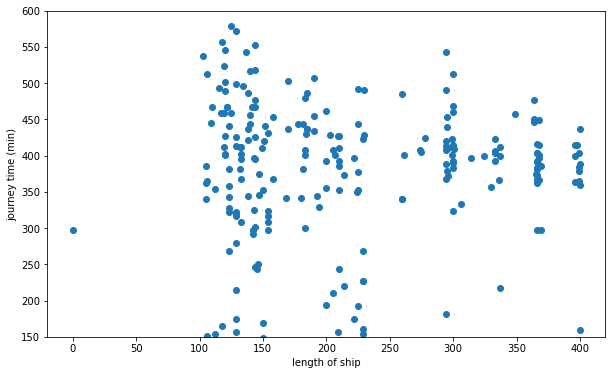

In [158]:
fig,axs = plt.subplots(1,1, figsize=(10,6))
axs.scatter(combined_df["Length"], combined_df["minutes"])
axs.set_xlabel("length of ship")
axs.set_ylabel("journey time (min)")
axs.set_ylim(150, 600)
plt.show()

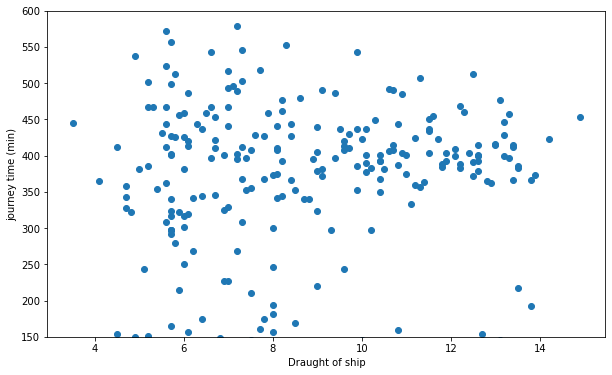

In [186]:
fig,axs = plt.subplots(1,1, figsize=(10,6))
axs.scatter(combined_df["Draught"], combined_df["minutes"])
axs.set_xlabel("Draught of ship")
axs.set_ylabel("journey time (min)")
axs.set_ylim(150, 600)
plt.show()

In [159]:
from sklearn.linear_model import LinearRegression

In [170]:
model_df = combined_df[(combined_df["minutes"]>150) & (combined_df["minutes"]<400)]

In [171]:
X = model_df[["Length", "Breadth", "Draught"]]
y = model_df["minutes"]

In [172]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [173]:
predicted_values = model.predict(X)

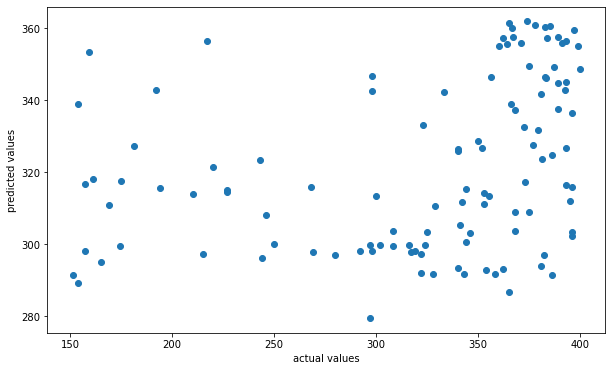

In [177]:
fig,axs = plt.subplots(1,1, figsize=(10,6))
axs.scatter(y, predicted_values)
axs.set_xlabel("actual values")
axs.set_ylabel("predicted values")
plt.show()

In [184]:
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
np.sqrt(mean_squared_error(y, predicted_values))

70.27446737387987

In [185]:
r2_score(y, predicted_values)

0.09902813813505407